### Plotting the ADCP spectra

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 23 days


Little tweaks in the matplotlib configuration to make nicer plots

In [3]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

Define nice colors

In [4]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=3
aph=.7

### Load data

In [17]:
data_path = './outputs/'
slab1=np.load(data_path+'adcp_spec_slab1.npz')
slab2=np.load(data_path+'adcp_spec_slab2.npz')
slab3=np.load(data_path+'adcp_spec_slab3.npz')
slab2ns=np.load(data_path+'adcp_spec_slab2ns.npz')
kK = slab1['kK1']

In [22]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .2e-4*(ks**(-2))
Es3 = .5e-6*(ks**(-3))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')

def plt_adcp_spectrum(slab,vlevel=1,lw=3):
    """ Plots ADCP spectrum in the given vertical level 
            slab is a dictionary contaning the spectra """
    
    if vlevel==1:
        ltit = r'26-50 m, 232 DOF' 
        fig_num = 'a'
    elif vlevel==2:
        ltit=r'58-98 m, 238 DOF'
        fig_num = 'b'
    elif vlevel==3:
        ltit=r'106-202 m, 110 DOF'
        fig_num = 'c'

    
    fig = plt.figure(facecolor='w', figsize=(11.,12.))
    ax1 = fig.add_subplot(111)

    ax1.fill_between(slab['k'],slab['Eul']/2.,slab['Euu']/2., color=color1, alpha=0.35)
    ax1.fill_between(slab['k'],slab['Evl']/2.,slab['Evu']/2., color=color2, alpha=0.35)
    ax1.set_xscale('log'); ax1.set_yscale('log')

    ax1.loglog(slab['k'],slab['Eu']/2.,color=color1,linewidth=lw,label=r'$\hat{C}^u$: across-track')
    ax1.loglog(slab['k'],slab['Ev']/2.,color=color2,linewidth=lw,label=r'$\hat{C}^v$: along-track')

    ax1.loglog(kK,slab['Kpsi']/2,color=color3,linewidth=lw,\
               label='$\hat{C}^\psi$: rotational')
    ax1.loglog(kK,slab['Kphi']/2,color=color4,linewidth=lw,\
               label='$\hat{C}^\phi$: divergent')

    ax1.loglog(slab['ks'],slab['Enoise']/2., color='.5',alpha=.7, linewidth=lw1,label='instrumental error')
    ax1.loglog(slab['ks'],slab['Es2'],'--', color='k',linewidth=2.,alpha=.7)
    ax1.loglog(slab['ks'],slab['Es3'],'--', color='k',linewidth=2.,alpha=.7)
    ax1.axis((1./(1000),1./4,.4e-5,10))
    
    ax1.loglog(ks,Es2,'--', color='k',linewidth=2.,alpha=.5)
    ax1.loglog(ks,Es3,'--', color='k',linewidth=2.,alpha=.5)

    ax1.axis((1./(1000),1./4,.4e-5,10))

    plt.text(0.0011, 5.41,u'k$^{-2}$')
    plt.text(0.0047, 5.51,u'k$^{-3}$')
    
    plt.xlabel('Along-track wavenumber [cpkm]')
    plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
    
    lg = plt.legend(loc=3,title=ltit, numpoints=1,ncol=2)
    lg.draw_frame(False)

    plt.axis((1./1.e3,1.,1./1.e6,1.e1))

    plt.text(0.15, 5., "ADCP", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

    plt.text(0.7, 4.5, fig_num, size=35, rotation=0.)

    add_second_axis(ax1)
    
    plt.savefig('figs/spec_adcp_slab'+str(vlevel)+'_bcf_decomp_ke',bbox_inches='tight')

### Call the function to plot the spectra

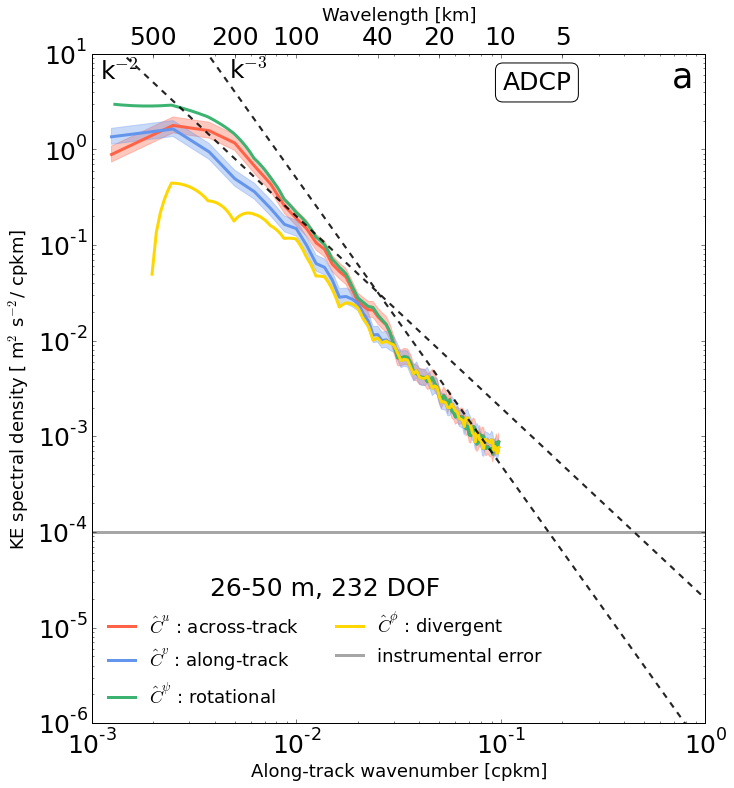

In [23]:
## 26-50 m
plt_adcp_spectrum(slab1,vlevel=1)

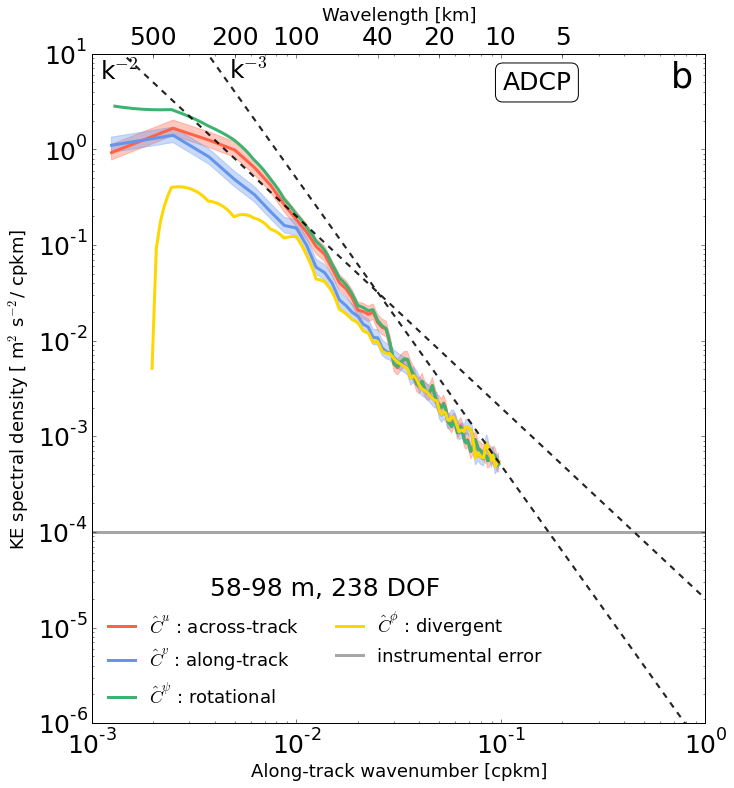

In [24]:
##  58-98 m
plt_adcp_spectrum(slab2,vlevel=2)

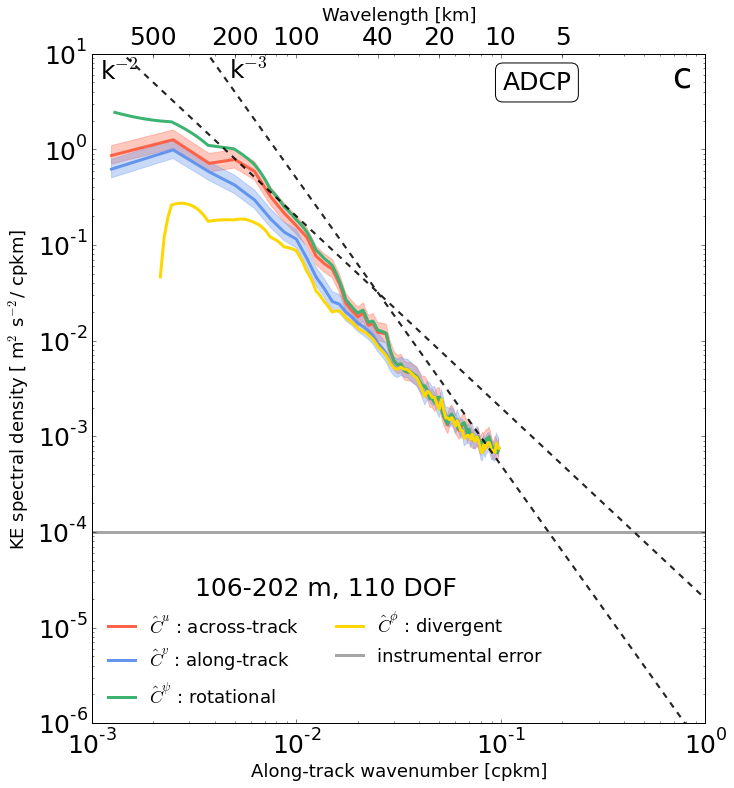

In [25]:
## 106-202 m
plt_adcp_spectrum(slab3,vlevel=3)

### Now plot the spectra for sub-transects to the north and south of the polar front

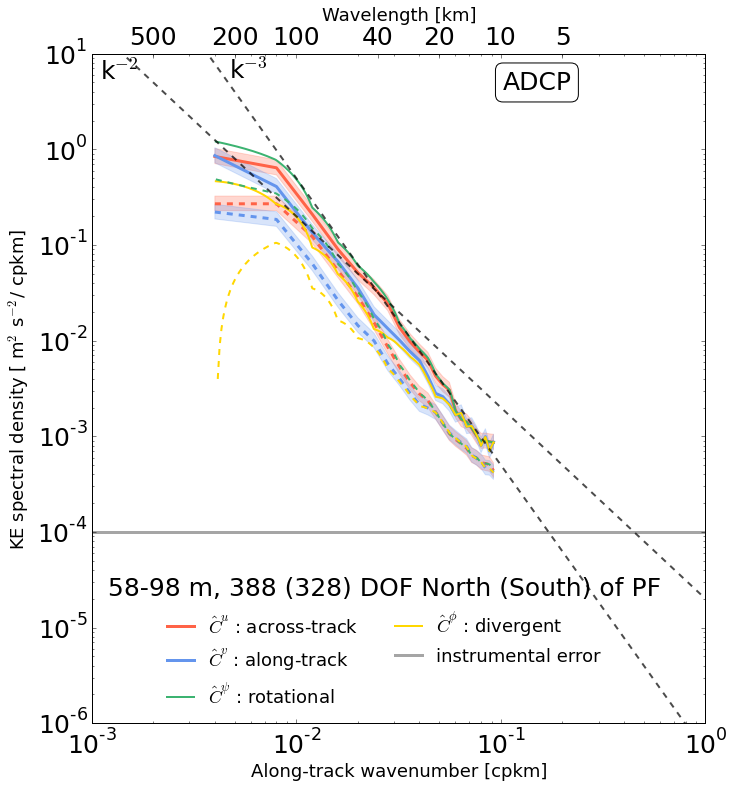

In [27]:
fig = plt.figure(figsize=(11.,12.))
ax1 = fig.add_subplot(111)

ax1.fill_between(slab2ns['kns'],slab2ns['Euln']/2,slab2ns['Euun']/2, color=color1, alpha=0.25)
ax1.fill_between(slab2ns['kns'],slab2ns['Evln']/2,slab2ns['Evun']/2, color=color2, alpha=0.25)

ax1.fill_between(slab2ns['kns'],slab2ns['Euls']/2,slab2ns['Euus']/2, color=color1, alpha=0.25)
ax1.fill_between(slab2ns['kns'],slab2ns['Evls']/2,slab2ns['Evus']/2, color=color2, alpha=0.25)

ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(slab2ns['kns'],slab2ns['Eun']/2,color=color1,linewidth=lw1,label='$\hat{C}^u$: across-track')
ax1.loglog(slab2ns['kns'],slab2ns['Evn']/2,color=color2,linewidth=lw1,label='$\hat{C}^v$: along-track')
ax1.loglog(slab2ns['kns'],slab2ns['Eus']/2,'--',color=color1,linewidth=lw1)
ax1.loglog(slab2ns['kns'],slab2ns['Evs']/2,'--',color=color2,linewidth=lw1)

ax1.loglog(slab2ns['kKn'],slab2ns['Kpsin']/2,color=color3,linewidth=2.,
           label='$\hat{C}^\psi$: rotational')
ax1.loglog(slab2ns['kKn'],slab2ns['Kphin']/2,color=color4,linewidth=2.,
           label='$\hat{C}^\phi$: divergent')

ax1.loglog(slab2ns['kKs'],slab2ns['Kpsis']/2,'--',color=color3,linewidth=2.)
ax1.loglog(slab2ns['kKs'],slab2ns['Kphis']/2,'--',color=color4,linewidth=2.)

ax1.loglog(slab2ns['ks'],slab2ns['Enoise']/2., color='.5',alpha=.7, linewidth=lw1,label='instrumental error')
ax1.loglog(slab2ns['ks'],slab2ns['Es2'],'--', color='k',linewidth=2.,alpha=.7)
ax1.loglog(slab2ns['ks'],slab2ns['Es3'],'--', color='k',linewidth=2.,alpha=.7)

ax1.axis((1./(1000),1./4,.4e-5,10))
plt.text(0.0011, 5.41,u'k$^{-2}$')
plt.text(0.0047, 5.51,u'k$^{-3}$')

plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=3,title=r"58-98 m, 388 (328) DOF North (South) of PF", numpoints=1,ncol=2)
lg.draw_frame(False)

plt.axis((1./1.e3,1.,1./1.e6,1.e1))

plt.text(0.15, 5., "ADCP", size=25, rotation=0.,
            ha="center", va="center",
            bbox = dict(boxstyle="round",ec='k',fc='w'))

#plt.text(0.7, 4.5, 'd', size=35, rotation=0.)

add_second_axis(ax1)
    
plt.savefig('figs/spec_adcp_slab2ns_decomp_ke_bw',bbox_inches='tight')